In [1]:
######################################################
# Simulating a spiral galaxy : Ionization            #
######################################################

import numpy as np
import scipy as sp
from astropy.io import fits
import matplotlib
%matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import PIL
from PIL import Image
from scipy.ndimage import correlate
import matplotlib.colors as colors
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
print('Import done')
from matplotlib.colors import LogNorm
from scipy.ndimage import gaussian_filter
from scipy.spatial import Delaunay
from scipy.spatial import cKDTree
from scipy.spatial import KDTree
from scipy.interpolate import griddata
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print(sns.__version__)

from astropy.table import QTable, Table, Column
from astropy import units as u

import matplotlib.image as mpimg
#
#
#
from pyHIIExplorer.HIIblob import *
from pyHIIExplorer.extract import *
import time

#
# Only for plotting
#
def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)
from mpl_toolkits import axes_grid1




Import done
0.10.1


#
# 
#
ratio=3.08567758e24
L=4*3.1416*(DL**2)*1/(1+z_red)
DA=DL/(1+z_red)**2/206.264806/ratio

L_Ha_cor=Ha_cor*L*(1e-16)
Qo=(7.315e11)*L_Ha_cor # s^-1
c=29979245800 # cm/s
nH=300 # cm^-3

rad_HII=np.sqrt(Qo/(4*3.14159*c*(10**(log_U))*nH))
rad_HII=rad_HII/(100*3.0857e16); # pc

rad_HII_arc = rad_HII / DA

rad_HII_arc = np.sqrt(Qo)*np.sqrt(1/(4*3.14159*c*(10**(log_U))*nH)) / DA
A = np.sqrt(Qo)
A = np.sqrt((7.315e11)*Ha_cor*4*3.1416*(DL**2)*1/(1+z_red)*(1e-16)) 
B = np.sqrt((7.315e11)*Ha_cor*4*3.1416*1/(1+z_red)*(1e-16))
A = DL * B
rad_HII_arc = ( DL * B / DA ) * np.sqrt(1/(4*3.14159*c*(10**(log_U))*nH))

Ha_cor_16 = Ha_cor * (1e-16)

rad_HII_arc = ((1+z_red)**2*206.264806*ratio) * np.sqrt((7.315e11)*Ha_cor_16*1/((1+z_red)*c*(10**(log_U))*nH))

#z_red -> small value
#log_U ~ -3
rad_HII_arc = (206.264806*3.08567758e24) *  np.sqrt((7.315e11)*Ha_cor_16*1/((c*(10**(log_U))*nH))

C = (206.264806*3.08567758e24) * np.sqrt((7.315e11)/29979245800 * 10**3 *1e-16)

C =9.941970987076027e+28

9.941970987076028e+20/(3.0857e16)
C_arc = 0.03221949958542965

C_arc = 0.003221949958542965

rad_HII_arc = 0.32219 * np.sqrt(Ha_Flux

#
#
#

log_U = -1.40*log10(rat_SII_Hb_cor)-3.26
rad_HII_arc = 0.00032219499585429647 * Ha_flux_16 * 10 ** (3-log_U)/2



In [2]:
#name='NGC2906'
name='HCG91c'
#name='NGC4030'
file_table_HII = '../../newHIIExplorer/MUSE/HII.'+name+'.flux_elines.fits.gz'
t_HII = Table.read(file_table_HII, format='fits')
mask_Ha = t_HII['flux_Ha']>0
R = t_HII['R'][mask_Ha]
Ha=t_HII['flux_Ha'][mask_Ha]
Hb=t_HII['flux_Hb'][mask_Ha]
OIII=t_HII['flux_[OIII]4959'][mask_Ha]
NII=t_HII['flux_[NII]6584'][mask_Ha]
SII_1=t_HII['flux_[SII]6717'][mask_Ha]
SII_2=t_HII['flux_[SII]6731'][mask_Ha]
SII=SII_1+SII_2
OI=t_HII['flux_[OI]'][mask_Ha]
EW_Ha=t_HII['EW_Ha'][mask_Ha]
O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
rat_SII_Ha = SII / Ha
rat_NII_Ha = NII / Ha
#log_U = -1.40*np.log10(rat_SII_Ha*2.86)-3.26
log_U = -1.40*np.log10(rat_NII_Ha*2.86)-3.26
rad_HII_arc = 0.032219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2) * (1/0.5) # kpc->arcsec
#print(rad_HII_arc)
print("DONE")

DONE


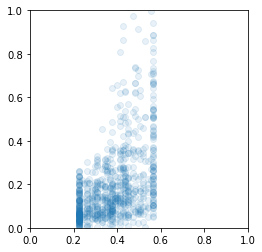

In [3]:
#print(t_HII.colnames)
%matplotlib inline
plt.scatter(R*0.2,rad_HII_arc,alpha=0.1)
plt.xlim(0,1)
plt.ylim(0,1)
plt.axes().set_aspect('equal', adjustable='box')

(0.0, 350.0)

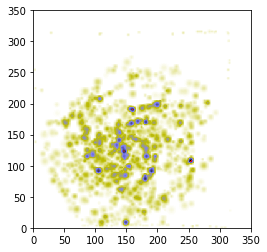

In [4]:
R_in = t_HII['R'][mask_Ha]
Y_in = t_HII['Y'][mask_Ha]
X_in = t_HII['X'][mask_Ha]

blobs_in = np.swapaxes(np.array((Y_in,X_in,R_in)),axis1=0,axis2=1)

#blobs_in = np.swapaxes(np.array((t_HII['Y'][mask_Ha],\
#                     t_HII['X'][mask_Ha],\
#                     t_HII['R'][mask_Ha])),axis1=0,axis2=1)
#print(blobs_in[:,2])
#flux_in  = t_HII['flux_Hb'][mask_Ha]
flux_in  = t_HII['flux_Ha'][mask_Ha]
#flux_in  = t_HII['flux_[NII]6548'][mask_Ha]
#flux_[NII]6584

nx_in = 350
ny_in = 350
#dr = 3
img_HII = create_HII_image(blobs_in,flux_in,nx_in,ny_in,dr=3)
cmap='gist_stern_r'
plt.imshow(img_HII, interpolation='none',\
           cmap=cmap, label=r'H$\alpha$',\
           norm=colors.PowerNorm(gamma=0.5)) 
plt.xlim(0,nx_in)
plt.ylim(0,ny_in)


(0.0, 300.0)

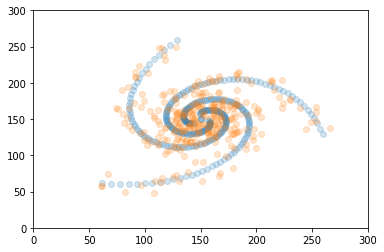

In [5]:
def create_spiral(r=0.85,ab=0.85,PA=45, A=0.5,B=1,C=5,N_sp=2):
    ang = np.linspace(-3.1416,3.1416,100)
    x_circ=r*np.sin(ang)+r*np.cos(ang)
    y_circ=-r*np.cos(ang)+r*np.sin(ang)
    pa=(PA/180)*3.1416
    ang = np.linspace(-3.1416,3.1416,100)
    x_e_o=r*np.sin(ang)+r*np.cos(ang)
    y_e_o=ab*(-r*np.cos(ang)+r*np.sin(ang))
    x_e = x_e_o*np.cos(pa)+y_e_o*np.sin(pa)
    y_e = x_e_o*np.sin(pa)-y_e_o*np.cos(pa)
    ang = np.linspace(0,2*3.1416,100)
    #A=0.5
    #B=1
    #C=5 #(5.3/180)*3.1416
    R_sp=A/np.log(B*np.tan(ang/(2*C)))
    #N_sp=2
    n_el=ang.shape[0]
    x_e_sp_o=np.zeros(n_el*N_sp)
    y_e_sp_o=np.zeros(n_el*N_sp)
    for i_sp in range(N_sp):
        n_sp1=i_sp*n_el
        n_sp2=(i_sp+1)*n_el
        x_e_sp_o[n_sp1:n_sp2]  = R_sp*np.cos(ang+i_sp*3.1416/N_sp*2)
        y_e_sp_o[n_sp1:n_sp2] = ab*R_sp*np.sin(ang+i_sp*3.1416/N_sp*2)

    r_dist = A*np.sqrt(x_e_sp_o**2+y_e_sp_o**2)
    x_e_sp = x_e_sp_o*np.cos(pa)+y_e_sp_o*np.sin(pa)
    y_e_sp = x_e_sp_o*np.sin(pa)-y_e_sp_o*np.cos(pa)
    x_e_sp_r = x_e_sp+A*0.7*(np.random.rand(*x_e_sp_o.shape)-0.5)
    y_e_sp_r = y_e_sp+A*0.7*(np.random.rand(*x_e_sp_o.shape)-0.5)
    d_r=np.sqrt((x_e_sp_r-x_e_sp)**2+(y_e_sp_r-y_e_sp)**2)

    mask_sp = np.isfinite(x_e_sp) & np.isfinite(y_e_sp)# & (x_e_sp>0)
    x_e_sp=x_e_sp[mask_sp]
    y_e_sp=y_e_sp[mask_sp]
    r_e_sp=np.sqrt(x_e_sp**2+y_e_sp**2)
    #O3_sp=-0.6+0.3*r_e_sp*2
    N2_sp=-0.5-0.1*r_e_sp*2+0.4*(np.random.rand(*x_e_sp_o.shape)-0.5)
    O3_sp=0.5/(N2_sp+0.1)+0.5+0.4*(np.random.rand(*x_e_sp_o.shape)-0.5)
    EW_sp = 0.5+0.95+0.51*r_e_sp*2
    
    return x_e_sp,y_e_sp,r_e_sp,x_e_sp_r,y_e_sp_r,N2_sp,O3_sp,EW_sp,r_dist
###################################################

#x_sp,y_sp,r_sp,N2_sp,O3_sp,EW_sp = create_spiral(r=0.85,ab=0.85,PA=25, A=0.5,B=1,C=5,N_sp=15)
##########################################
# Spiral definition parameters
r=0.85
PA = 45
ab = 0.85
A=0.5
B=1
C=5
N_sp=3
##########################################
x_sp,y_sp,r_sp,x_sp_r,y_sp_r,N2_sp,O3_sp,EW_sp,r_dist = create_spiral(r=r,ab=ab,PA=PA, A=A,B=B,C=C,N_sp=N_sp)
x_c = 150
y_c = 150
size = 80
r_dist=size*r_dist
x_e_sp=x_c+size*x_sp
y_e_sp=y_c+size*y_sp

x_e_sp_r=x_c+size*x_sp_r
y_e_sp_r=y_c+size*y_sp_r
plt.scatter(x_e_sp,y_e_sp,alpha=0.2)

plt.scatter(x_e_sp_r,y_e_sp_r,alpha=0.2)
nx_in = 2*x_c
ny_in = 2*y_c
plt.xlim(0,nx_in)
plt.ylim(0,ny_in)

# For now
#cont = 1
#rat_NII_Ha = 10**(N2_sp)
#Ha = EW_sp * cont
#log_U = -1.40*np.log10(rat_NII_Ha*2.86)-3.26
#rad_HII_arc = 0.32219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2)


(-3.0, 1.2)

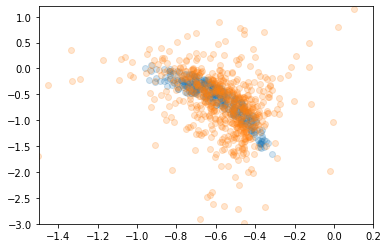

In [6]:
plt.scatter(N2_sp,O3_sp, alpha=0.2)
plt.scatter(N2,O3,alpha=0.2)
plt.xlim(-1.5,0.2)
plt.ylim(-3,1.2)
#O3=np.log10(OIII)-np.log10(Hb)
#N2=np.log10(NII)-np.log10(Ha)

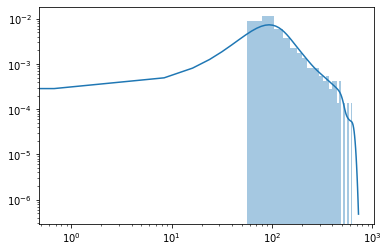

In [7]:
#
# Parameters defining the spiral!
#
spax_scale = 0.2

cont_peak = 2
h_scale = 10/spax_scale
r_disk = r_dist/h_scale
cont = cont_peak*np.exp(-r_disk)

rat_NII_Ha = 10**(N2_sp)
Ha = 10**(EW_sp) * cont
NII = rat_NII_Ha * Ha
Hb = Ha/2.86 # We need to add dust
OIII = Hb*10**(O3_sp)
log_U = -1.40*np.log10(rat_NII_Ha*2.86)-3.26
#rad_HII_arc = 0.32219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2) 
rad_HII_arc = 0.032219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2) #* (1/0.8) # kpc->arcsec
rad_HII_arc = rad_HII_arc / spax_scale

f2L=5*10**37*(0.2**2)
ax=sns.distplot(Ha)
ax.set_yscale('log')
ax.set_xscale('log')

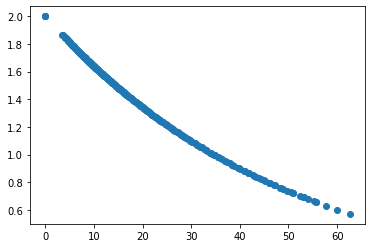

In [8]:
plt.scatter(r_dist,cont)

In [40]:
def create_DIG (x_c=x_c,y_c=x_c,PA=PA,ab=ab,h_scale=h_scale,cont_peak=cont_peak,size=size):
    nx_in = 2*x_c
    ny_in = 2*y_c
    x = np.arange(0, nx_in, 1)
    y = np.arange(0, ny_in, 1)
    xv, yv = np.meshgrid(x, y)
    pa=(PA/180)*3.1416
    x_e_sp = ab*((xv-x_c)*np.cos(pa)+(yv-y_c)*np.sin(pa))
    y_e_sp = ((xv-x_c)*np.sin(pa)-(yv-y_c)*np.cos(pa))
    rv = np.sqrt(x_e_sp**2+y_e_sp**2)
    rv_disk = rv/h_scale
    cont_v = cont_peak*np.exp(-rv_disk)
    EW_v= 0.5+1.0*np.random.rand(ny_in,nx_in)
    Ha_v = EW_v*cont_v
    slope_rand=0.25+0.2*np.random.rand(1)  
    N2_v=0.2+slope_rand[0]*rv_disk/size+0.5*(np.random.rand(ny_in,nx_in)-0.5)
    slope_rand=1.7/4+1.3*(np.random.rand(1)-0.5)
    O3_v=0.15+slope_rand[0]*rv_disk/size+0.5*(np.random.rand(ny_in,nx_in)-0.5)
    NII_v = 10**(N2_v)*Ha_v
    Hb_v = Ha_v/2.86
    OIII_v = 10**(O3_v)*Hb_v
    cube_v=np.array((Hb_v,OIII_v,Ha_v,NII_v))
    return cube_v

cube_v = create_DIG (x_c, y_c , PA, ab, h_scale, cont_peak)
#cube_v = cube_v * 10

f_scale=2
hdu_cube_v = fits.PrimaryHDU(data = cube_v*f_scale)
hdu_cube_v.writeto('diff.cube.fits.gz', overwrite=True)

#plt.imshow(NII_v)
#plt.imshow(EW_v*cont_v)
#print(rv)

Num. IN =  300


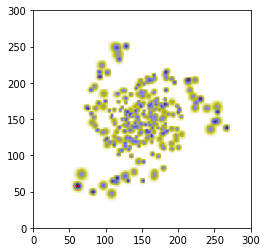

In [44]:
#
# Parameters defining the spiral!
#
#spax_scale = 0.2
#cont_peak = 1
#h_scale = 20/spax_scale
#r_disk = r_dist/h_scale
#cont = cont_peak*np.exp(-r_disk)
#rat_NII_Ha = 10**(N2_sp)
#Ha = 10**(EW_sp) * cont
#NII = rat_NII_Ha * Ha
#Hb = Ha/2.86 # We need to add dust
#OIII = Hb*10**(O3_sp)
#log_U = -1.40*np.log10(rat_NII_Ha*2.86)-3.26
#rad_HII_arc = 0.32219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2) 
#rad_HII_arc = 0.032219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-2.8)/2) * (1/0.5) # kpc->arcsec
#rad_HII_arc = rad_HII_arc / spax_scale

#
# Creating image!
#

nx_in = 2*x_c
ny_in = 2*y_c


R_in = rad_HII_arc/np.sqrt(2)
X_in = x_e_sp_r
Y_in = y_e_sp_r
flux_in  = Ha
blobs_in = np.swapaxes(np.array((Y_in,X_in,R_in)),axis1=0,axis2=1)
img_HII = create_HII_image(blobs_in,flux_in,nx_in,ny_in,dr=3)
cmap='gist_stern_r'
plt.imshow(img_HII, interpolation='none',\
           cmap=cmap, label=r'H$\alpha$',\
           norm=colors.PowerNorm(gamma=0.5)) 
plt.xlim(0,nx_in)
plt.ylim(0,ny_in)

blobs_in = np.swapaxes(np.array((Y_in,X_in,R_in)),axis1=0,axis2=1)
img_Ha = create_HII_image(blobs_in,Ha,nx_in,ny_in,dr=3)
img_Hb = create_HII_image(blobs_in,Hb,nx_in,ny_in,dr=3)
img_NII = create_HII_image(blobs_in,NII,nx_in,ny_in,dr=3)
img_OIII = create_HII_image(blobs_in,OIII,nx_in,ny_in,dr=3)



#
# We create the diffuse!
#

cube=np.array((img_Hb,img_OIII,img_Ha,img_NII))



hdu_hdr = {}
hdu_hdr['CRVAL1'] = nx_in/2*spax_scale
hdu_hdr['CRVAL2'] = ny_in/2*spax_scale
hdu_hdr['CRPIX1'] = nx_in/2
hdu_hdr['CRPIX2'] = ny_in/2
hdu_hdr['CDELT1'] = (-1)*spax_scale
hdu_hdr['CDELT2'] = spax_scale
hdu_hdr['NAME0'] = 'flux_Hb'
hdu_hdr['NAME1'] = 'flux_[OIII]'
hdu_hdr['NAME2'] = 'flux_Ha'
hdu_hdr['NAME3'] = 'flux_[NII]'
hdu_hdr = fits.Header(hdu_hdr)
hdu_cube = fits.PrimaryHDU(data = cube*f_scale, header=hdu_hdr)
hdu_cube.writeto('HII_IN.cube.fits.gz', overwrite=True)

cube = cube + cube_v
cube = cube * f_scale

hdu_hdr = fits.Header(hdu_hdr)
hdu_cube = fits.PrimaryHDU(data = cube, header=hdu_hdr)
hdu_cube.writeto('sim.cube.fits.gz', overwrite=True)
print('Num. IN = ',len(blobs_in))


img_Ha = img_Ha+cube_v[2,:,:]

unable to find device '23'
Reading cube  sim.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)


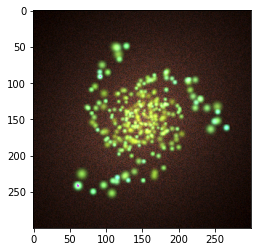

In [42]:
!RGB_img_cube_sim.py sim.cube.fits.gz sim_test.png
img = mpimg.imread('sim_test.png')
imgplot = plt.imshow(img)
dims=img.shape
#plt.xlim(0,dims[0])
#plt.ylim(0,dims[1])

# 1sig Ha-map =  0.5 ; 1sig MUSE-V  0.01
# HII reg. Initial =  193
# HII reg. 2nd =  191
# HII reg. additional =  91
# Last iteration Num. =  204
# Clean above 3sigma Num =  204
# X_sqr =  6.406963772612963
# HII reg clean= 204


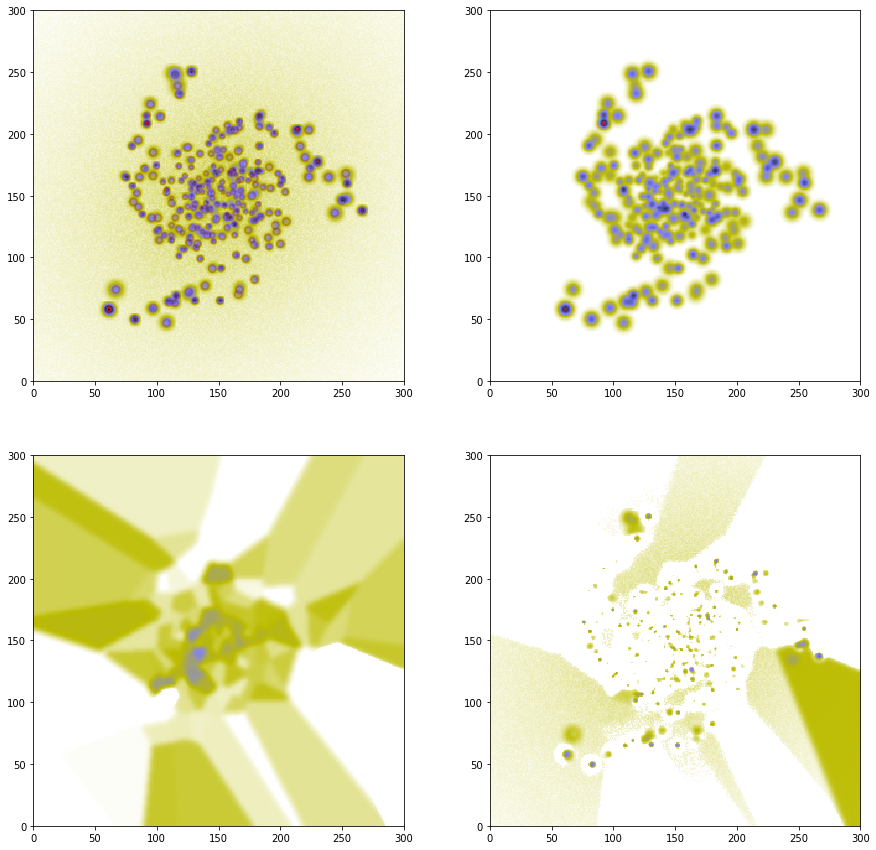

In [20]:
img_cont = gaussian_filter(img_Ha, sigma=2)

#blobs_final,blobs_F_Ha,image_HII,\
#diff_map_final,diff_points,diff_Flux=HIIblob(img_Ha,img_cont,\
#                                                        0.5, MUSE_1sig=0.1,\
#                                             MUSE_1sig_V=0.01, plot=1, refined = 1)
FWHM=0.4/spax_scale 

blobs_final,blobs_F_Ha,image_HII,\
diff_map_final,diff_points,diff_Flux=HIIblob(img_Ha,img_cont, FWHM, MUSE_1sig=0.5,\
                                             MUSE_1sig_V=0.01, plot=1, refined = 3, num_sigma=300)


0   4  val_now= flux_Hb
e= 0 , refined=  3 , kind= 0
1   4  val_now= flux_[OIII]
e= 0 , refined=  3 , kind= 0
2   4  val_now= flux_Ha
e= 0 , refined=  3 , kind= 0
3   4  val_now= flux_[NII]
e= 0 , refined=  3 , kind= 0
1st Extraction
New Diff created
0   4  val_now= flux_Hb
e= 0 , refined=  0 , kind= 0
1   4  val_now= flux_[OIII]
e= 0 , refined=  0 , kind= 0
2   4  val_now= flux_Ha
e= 0 , refined=  0 , kind= 0
3   4  val_now= flux_[NII]
e= 0 , refined=  0 , kind= 0
2nd Extraction


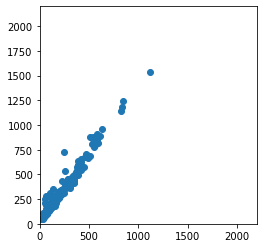

In [33]:
WCS, hdu_HII, hdu_DIG, table_HII, table_DIG = extracting_flux_elines("sim", hdu_cube, blobs_final, diff_points, FWHM,  plot=0)

print("1st Extraction")
cube_diff = create_diff_cube(hdu_cube.data-hdu_HII.data,blobs_final,FWHM,diff_points)
print("New Diff created")
data_DIG = hdu_DIG.data
data_DIG = cube_diff
def_DIG=1
WCS, hdu_HII, hdu_DIG, table_HII, table_DIG = extracting_flux_elines(name, hdu_cube, blobs_final, diff_points, FWHM,  plot=0, def_DIG=def_DIG, cube_DIG=data_DIG)    
hdu_DIG.data = data_DIG
print("2nd Extraction")


#print(table_HII['Ha'])
ax = plt.subplot(111)
ax.scatter(blobs_F_Ha,table_HII['flux_Ha'])
ax.set_xlim(0,2200)
ax.set_ylim(0,2200)
ax.set_aspect('equal')

unable to find device '23'
Reading cube  HII.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)
unable to find device '23'
Reading cube  HII_IN.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)
unable to find device '23'
Reading cube  DIG.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)
unable to find device '23'
Reading cube  SUM.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)
unable to find device '23'
Reading cube  diff.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)
unable to find device '23'
Reading cube  RES.cube.fits.gz
done
shape = 300,300
img_scale : sqrt
img_scale : sqrt
img_scale : sqrt
ShapeRGB =(300, 300, 3)


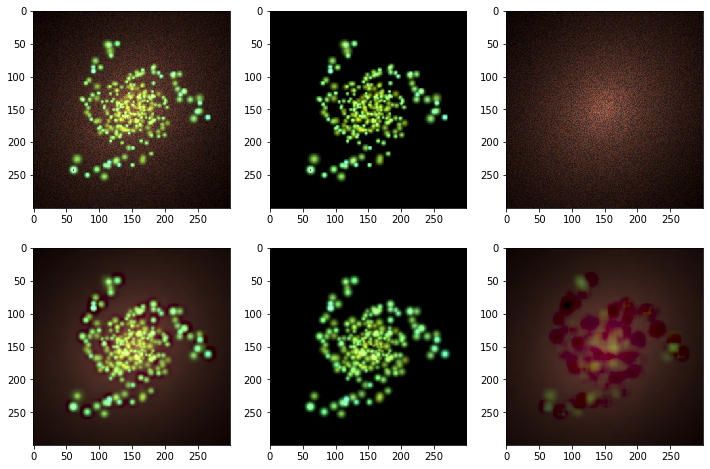

In [48]:
#WCS, hdu_HII, hdu_DIG, table_HII, table_DIG = extracting_flux_elines("sim", hdu_cube, blobs_final, diff_points, FWHM,  plot=0)
hdu_SUM = hdu_HII.copy()
hdu_RES = hdu_HII.copy()
hdu_SUM.data = hdu_SUM.data+hdu_DIG.data
hdu_RES.data = hdu_cube.data-hdu_SUM.data


hdu_HII.writeto('HII.cube.fits.gz', overwrite=True)
hdu_DIG.writeto('DIG.cube.fits.gz', overwrite=True)
hdu_SUM.writeto('SUM.cube.fits.gz', overwrite=True)
hdu_RES.writeto('RES.cube.fits.gz', overwrite=True)
!RGB_img_cube_sim.py HII.cube.fits.gz HII_test.png
!RGB_img_cube_sim.py HII_IN.cube.fits.gz HII_IN_test.png
!RGB_img_cube_sim.py DIG.cube.fits.gz DIG_test.png
!RGB_img_cube_sim.py SUM.cube.fits.gz SUM_test.png
!RGB_img_cube_sim.py diff.cube.fits.gz IN_DIG_test.png
!RGB_img_cube_sim.py RES.cube.fits.gz RES_test.png
img_HII = mpimg.imread('HII_test.png')
img_HII_IN = mpimg.imread('HII_IN_test.png')
img_DIG = mpimg.imread('DIG_test.png')
img_SUM = mpimg.imread('SUM_test.png')
img_IN_DIG = mpimg.imread('IN_DIG_test.png')
img_RES = mpimg.imread('RES_test.png')


fig, ax = plt.subplots(2,3,figsize=(12,8))
ax[0][0].imshow(img, interpolation='none')
ax[1][0].imshow(img_SUM, interpolation='none')

ax[0][1].imshow(img_HII_IN, interpolation='none')
ax[1][1].imshow(img_HII, interpolation='none')

ax[0][2].imshow(img_IN_DIG, interpolation='none')
ax[1][2].imshow(img_DIG, interpolation='none')


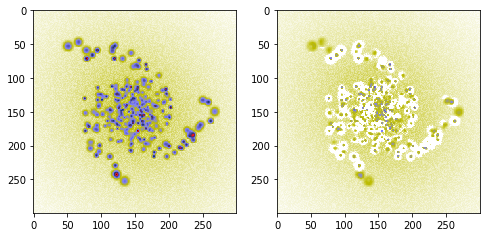

In [115]:
Ha_image_clean = img_Ha - image_HII
cmap = 'gist_stern_r'
fig, ax = plt.subplots(1,2,figsize=(8,4))
im_Ha_MUSE=ax[0].imshow(img_Ha, interpolation='none',\
                                     cmap=cmap, label=r'H$\alpha$',\
                                     norm=colors.PowerNorm(gamma=0.5)) 
clim=im_Ha_MUSE.properties()['clim']
ax[1].imshow(Ha_image_clean, interpolation='none',cmap=cmap,\
             norm=colors.PowerNorm(gamma=0.5),clim=clim) 

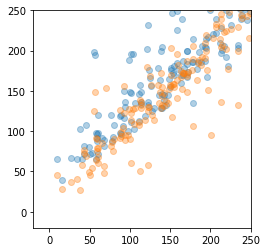

In [43]:
#plt.scatter(blobs_F_Ha,blobs_final[:,2])
#blobs_F_Ha
%matplotlib inline
blobs_F_Ha_0=extract_flux(blobs_final,img_Ha,kind=0,we=0)
blobs_F_Ha_1=extract_flux(blobs_final,img_Ha,kind=0,we=1)
blobs_F_Ha_2=extract_flux(blobs_final,img_Ha,kind=0,we=2)

blobs_F_Ha_3=extract_flux_refined(blobs_final,blobs_F_Ha_0,img_Ha,kind=0,we=2,dr=3,plot=0)
ax = plt.subplot(111)
ax.scatter(blobs_F_Ha,blobs_F_Ha_0,alpha=0.35)
#ax.scatter(blobs_F_Ha,blobs_F_Ha_1,alpha=0.35)
#ax.scatter(blobs_F_Ha,blobs_F_Ha_2,alpha=0.35)
ax.scatter(blobs_F_Ha,blobs_F_Ha_3,alpha=0.35)
ax.set_xlim(-20,250)
ax.set_ylim(-20,250)
ax.set_aspect('equal')


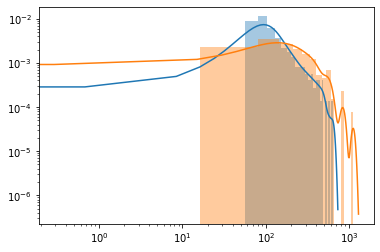

In [52]:
ax=sns.distplot(Ha)
sns.distplot(blobs_F_Ha,ax=ax)
#sns.distplot(table_HII['flux_Ha']/np.sqrt(2),ax=ax)


ax.set_yscale('log')
ax.set_xscale('log')

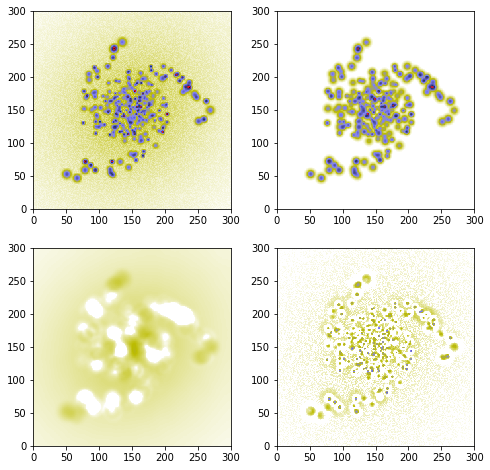

In [118]:
%matplotlib inline
Ha_image_clean = img_Ha - image_HII
image_diff=create_diff_new(Ha_image_clean,blobs_final,\
                        FWHM*2,diff_points,w_HII=30, w_DIG=30)
cmap = 'gist_stern_r'
fig, ax = plt.subplots(2,2,figsize=(8,8))
im_Ha_MUSE=ax[0][0].imshow(img_Ha, interpolation='none',\
                                     cmap=cmap, label=r'H$\alpha$',\
                                     norm=colors.PowerNorm(gamma=0.5)) 
clim=im_Ha_MUSE.properties()['clim']
ax[1][0].imshow(image_diff, interpolation='none',cmap=cmap,\
             norm=colors.PowerNorm(gamma=0.5),clim=clim) 
ax[0][1].imshow(image_HII, interpolation='none',cmap=cmap,\
             norm=colors.PowerNorm(gamma=0.5),clim=clim) 
img_res = img_Ha - (image_HII+image_diff)
#ax[1][1].imshow(Ha_image_clean, interpolation='none',cmap=cmap,\
#             norm=colors.PowerNorm(gamma=0.5),clim=clim) 
ax[1][1].imshow(img_res, interpolation='none',cmap=cmap,\
             norm=colors.PowerNorm(gamma=0.5),clim=clim) 
(nx,ny) = image_diff.shape
for ax_now in ax.reshape(-1):
    ax_now.set_xlim(0,nx)
    ax_now.set_ylim(0,ny)

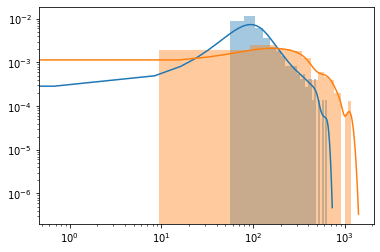

In [71]:
ax=sns.distplot(Ha)
sns.distplot(blobs_F_Ha,ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

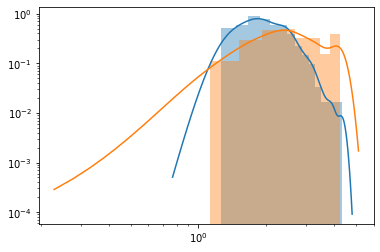

In [72]:
ax=sns.distplot(R_in)
sns.distplot(blobs_final[:,2],ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')

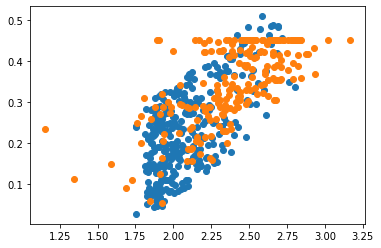

In [44]:
plt.scatter(np.log10(Ha),np.log10(R_in))
plt.scatter(np.log10(blobs_F_Ha*np.sqrt(2)),np.log10(blobs_final[:,2]))
#plt.scatter(np.log10(blobs_F_Ha),np.log10(blobs_final[:,2]))


In [237]:
name='NGC2906'
file_table_HII = '../../newHIIExplorer/CALIFA/HII.'+name+'.flux_elines.fits.gz'
t_HII = Table.read(file_table_HII, format='fits')
mask_Ha = t_HII['flux_Ha']>0
R = t_HII['R'][mask_Ha]
Ha=t_HII['flux_Ha'][mask_Ha]
Hb=t_HII['flux_Hb'][mask_Ha]
OIII=t_HII['flux_[OIII]4959'][mask_Ha]
NII=t_HII['flux_[NII]6584'][mask_Ha]
SII_1=t_HII['flux_[SII]6717'][mask_Ha]
SII_2=t_HII['flux_[SII]6731'][mask_Ha]
SII=SII_1+SII_2
OI=t_HII['flux_[OI]'][mask_Ha]
EW_Ha=t_HII['EW_Ha'][mask_Ha]
O3=np.log10(OIII)-np.log10(Hb)
N2=np.log10(NII)-np.log10(Ha)
S2=np.log10(SII/Ha)
O1=np.log10(OI/Ha)
rat_SII_Ha = SII / Ha
log_U = -1.40*np.log10(rat_SII_Ha*2.86)-3.26
rad_HII_arc = 0.32219499585429647 * np.sqrt(Ha) * 10 ** ((-log_U-3)/2)
print(rad_HII_arc)

      flux_Ha      
1e-16 erg / (cm2 s)
-------------------
 15.996630618242447
  4.211581924002513
  11.00619948819267
 10.459048553673044
  9.405676268917286
   11.6796886053179
 10.207667289942776
 12.159820423954741
  9.486620036939986
  7.738051140787566
                ...
 2.8883085573350376
 1.9951456949098758
                nan
 1.8285160318239895
  5.440915797140355
 2.4734425883339175
  2.645385123358295
 2.8092178717631304
  1.152005754870154
                nan
Length = 59 rows


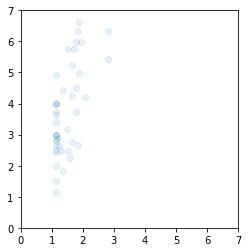

In [63]:
#print(t_HII.colnames)
plt.scatter(R,rad_HII_arc,alpha=0.1)
plt.xlim(0,7)
plt.ylim(0,7)
plt.axes().set_aspect('equal', adjustable='box')